# Лабораторная работа (3) по рекуррентным сетям

**Цель работы**

Целью данной лабораторной работы является изучение принципов работы рекуррентных нейронных сетей и применение их для решения задачи классификации текстов.

**Задача**

В данной работе необходимо предстоит решить задачу классификации текстов на два класса: положительный и отрицательный отзыв. Для этого Вам будет предложен набор данных IMDB из `tensorflow.keras.datasets`, который необходимо обработать и разделить на тренировочную и тестовую выборки. 

**Для этого:**

* Загрузить и проанализировать данные набора данных IMDB.
* Предобработать данные: преобразовать текстовые данные в числовой формат, нормализовать данные и т.д.
* Разбить данные на обучающую и тестовую выборки.
* Создать и обучить базовую рекуррентную нейронную сеть для классификации отзывов.
* Оценить качество модели на тестовой выборке.
* Попробовать улучшить качество модели, экспериментируя с гиперпараметрами и архитектурой модели.

**Инструкции:**

Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


Загрузка и анализ данных набора данных IMDB

Мы будем использовать встроенную функцию загрузки данных набора данных IMDB из библиотеки Keras. Эта функция загружает набор данных и разбивает его на обучающую и тестовую выборки.

При загрузке данных мы можем указать параметры num_words, которые задают максимальное количество слов, которые мы хотим использовать в нашей модели. В данном случае мы ограничим количество слов 10 000 (параметр можно изменить, если необходимо).

Для каждого отзыва имеется метка класса (1 - положительный отзыв, 0 - отрицательный отзыв).

In [ ]:
from tensorflow.keras.datasets import imdb

# настройки загрузки данных
number_of_words = 10000 # ограничение на количество слов
max_len = 200 # максимальная длина отзыва в словах

# загрузка данных и разделение на обучающую и тестовую выборки
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_words)

17464789/17464789 [==============================] - 0s 0us/step


 В данном датасете содержатся отзывы на фильмы и их оценки: положительный или отрицательный. Каждый отзыв представлен в виде последовательности индексов слов, где каждое слово соответствует определенному индексу.

In [ ]:
# ограничение длины отзывов
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

print('Форма обучающей выборки:', X_train.shape)
print('Форма тестовой выборки:', X_test.shape)
print(X_test)

Форма обучающей выборки: (25000, 200)
Форма тестовой выборки: (25000, 200)
[[   0    0    0 ...   14    6  717]
 [1987    2   45 ...  125    4 3077]
 [4468  189    4 ...    9   57  975]
 ...
 [   0    0    0 ...   21  846 5518]
 [   0    0    0 ... 2302    7  470]
 [   0    0    0 ...   34 2005 2643]]


**Моделирование**

– Построить модель `Sequential`, задав размерность эмбеддинга и слоев.

– Скомпилировать модель, с соответствующей функцией потерь и оптимизатором.

Создадим модель с двумя LSTM-слоями. В одном слое 128 нейронов, в другом 64. Обучим модель на тренировочных данных в течение пяти эпох. Оценим модель на тестовой выборке с помощью метрики accuracy.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 200, 128)          131584    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,461,057
Trainable params: 1,461,057
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
196/196 [==============================] - 315s 2s/step - loss: 0.5392 - accuracy: 0.7095 - val_loss: 0.3549 - val_accuracy: 0.8508
Epoch 2/5
196/196 [==========

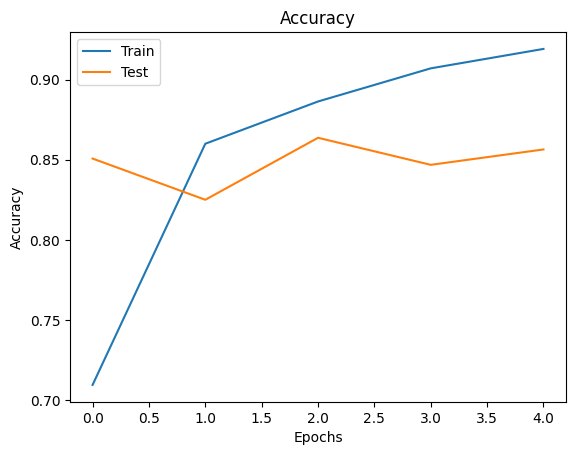

782/782 [==============================] - 127s 162ms/step - loss: 0.3580 - accuracy: 0.8564
accuracy: 85.6440007686615


In [ ]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Embedding(number_of_words, 128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
print(model.summary())

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=128, epochs=5)

plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

score = model.evaluate(X_test,y_test)
print("accuracy:", score[1]*100)

В результате оценки модели получаем точность 85.64%. Попробуем изменить LSTM слои на GRU с тем же количеством слоев, обучить и оценить качество модели.

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 gru_21 (GRU)                (None, 200, 128)          99072     
                                                                 
 gru_22 (GRU)                (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,416,385
Trainable params: 1,416,385
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
782/782 [==============================] - 441s 558ms/step - loss: 0.4501 - accuracy: 0.7832 - val_loss: 0.3272 - val_accuracy: 0.8594
Epoch 2/5
782/782 [======

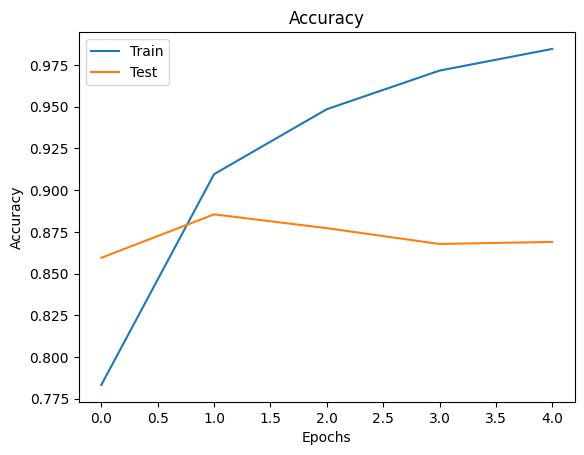

782/782 [==============================] - 71s 91ms/step - loss: 0.4540 - accuracy: 0.8690
accuracy: 86.89600229263306


In [ ]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Embedding(number_of_words, 128, input_length=max_len))
model.add(tf.keras.layers.GRU(128, return_sequences=True))
model.add(tf.keras.layers.GRU(64))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
print(model.summary())

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=32, epochs=5)

plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

score = model.evaluate(X_test,y_test)
print("accuracy:", score[1]*100)

Точность модели получаем 87%. Попробуем добавить слой SimpleRNN и увеличить количество эпох до 10. Увеличим размер бэтча

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,292,417
Trainable params: 1,292,417
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
196/196 [==============================] - 41s 199ms/step - loss: 0.5613 - accuracy: 0.6974 - val_loss: 0.4093 - val_accuracy: 0.8245
Epoch 2/10
196/196 [==============================] - 37s 187ms/step - loss: 0.3873 - accuracy: 0.8333 - val_loss: 0.4013 - val_accuracy: 0.8297
Epoch 3/10
1

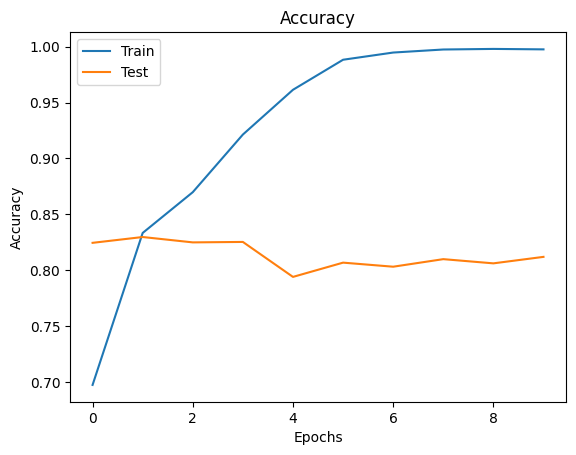

782/782 [==============================] - 15s 20ms/step - loss: 0.8515 - accuracy: 0.8119
accuracy: 81.19199872016907


In [ ]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Embedding(number_of_words, 128, input_length=max_len))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences=False))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
print(model.summary())

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=128, epochs=10)

plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

score = model.evaluate(X_test,y_test)
print("accuracy:", score[1]*100)

В результате оценки точность 82 %, что несколько ниже, чем у предыдущих моделей. Добавим слой GRU и Dropout, а также изменим оптимизатор на SGD, уменьшим размер бэтча, добавим слои Dropout.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 gru_1 (GRU)                 (None, 200, 256)          296448    
                                                                 
 dropout_2 (Dropout)         (None, 200, 256)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               49280     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,625,857
Trainable params: 1,625,857
No

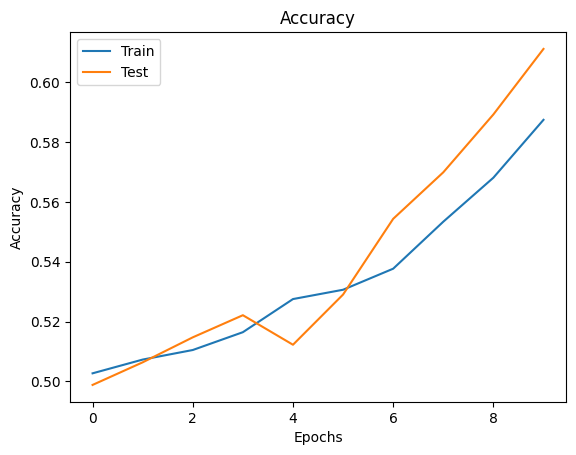

782/782 [==============================] - 173s 221ms/step - loss: 0.6639 - accuracy: 0.6112
accuracy: 61.11999750137329


In [ ]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Embedding(number_of_words, 128, input_length=max_len))
model.add(tf.keras.layers.GRU(256, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.SimpleRNN(128))
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])
print(model.summary())

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=64, epochs=10)

plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

score = model.evaluate(X_test,y_test)
print("accuracy:", score[1]*100)

В результате обучения нельзя судить о точности работы сети, так как выбранный оптимизатор повлиял на скорость обучения модели. Для улучшения качества обучения необходимо увеличить количество эпох, что существенно сказывается на времени обучения. Для обучения модели необходимо более 12 часов.
Добавим в модель слои Dropout, изменим оптимизатор на adam и увеличим количество эпох.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 gru_1 (GRU)                 (None, 200, 256)          296448    
                                                                 
 dropout_2 (Dropout)         (None, 200, 256)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               49280     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,625,857
Trainable params: 1,625,857
No

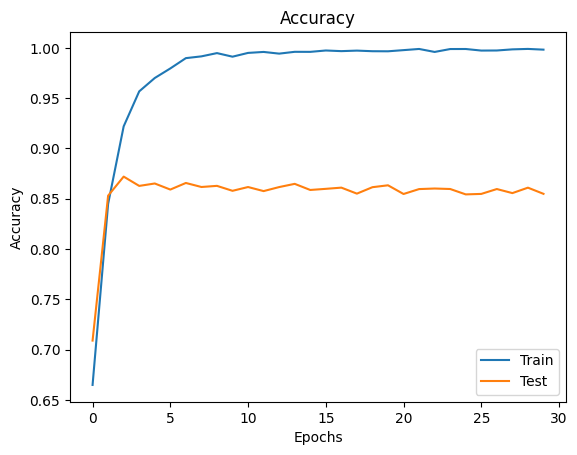

782/782 [==============================] - 17s 21ms/step - loss: 0.8278 - accuracy: 0.8548
accuracy: 85.48399806022644


In [ ]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Embedding(number_of_words, 128, input_length=max_len))
model.add(tf.keras.layers.GRU(256, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.SimpleRNN(128))
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
print(model.summary())

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=64, epochs=30)

plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

score = model.evaluate(X_test,y_test)
print("accuracy:", score[1]*100)

В результате тестирования модели видно, что увеличение количества эпох не привело к улучшению результатов. 

**Вывод**: в ходе лабораторной работы реализованы разные архитектуры рекурентных сетей, проведена оценка данных моделей на тестовых выборках. 

Модификация модели

Ваша задача - дополнить код и модифицировать данную модель для улучшения ее результатов. Например, вы можете изменять следующие параметры:

* Количество слоев LSTM/GRU/SimpleRNN
* Количество нейронов в слоях LSTM/GRU/SimpleRNN
* Коэффициент Dropout
* Функцию активации
* Оптимизатор
* Размер батча
* Количество эпох обучения


**Оценка работы**

Оценка работы будет производиться на основе полученных результатов. Необходимо предоставить отчет, в котором будет содержаться:

* Описание проведенных модификаций
* Графики обучения модели
* Результаты тестирования модели на тестовой выборке
* Код

Успехов в выполнении лабораторной работы!